# Luck or Skill?

## Introduction

Several days ago, when I was feeling frustrated about finding a job, my English tutor Robert Juza from Cambly recommended a video called "Is Success Luck or Hard Work?" made by Veritasium on Youtube[1]. In that video, the author mentioned a fascinating experiment to demonstrate that luck will play a more critical role in our daily lives and professional careers than we think.

The experiment is based on a class of NASA astronauts in 2017. There were 18300 applicants, and only 11 were selected and went to graduate from the astronaut training program. The author built a model and assumed the applicants were selected based on skill, experience, and hard work (total 95%) and also 5% as the result of luck. Veritasium randomly generated a skill score and a luck score out of 100 separately for each applicant, then got the weighted sum as the final score. After running the model a thousand times and comparing the ranks based on only skill and skill plus luck, the conclusion is very interesting." Even with luck accounting for just 5% of the outcome, 9 or maybe 10 of the 11 applicants selected would have been different if luck played no role at all," said Veritasium. 

The luck is overwhelmed overweighted, in my opinion. I decided to rebuild the model and test it.

## Model Rebuilding

### experiment 1

I started to build my model. 

Following the video, I assume the features, like skill, experience, hard work, and luck, are uniformly distributed between 0 and 100. I define the average score of every applicant's skill, experience, and hard work as their professional performance. Then I count luck into the final result and get the overall performance. Finally, I compare the top 11 applicants and find the common ones based on professional performance and overall performance. After repeating the experiments 1000 times, I find almost 8 out of 11 applicants on both lists. In other words, there are three people selected based on luck, not nine. 

Why is that? Did I do something wrong? Let's dig into my code and analyze the data.

In [45]:
#create data set:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statistics import mean
import math

num_applicants = 18300

#generate our applicants features and performance scores
def df_generate():
    df = pd.DataFrame(np.random.uniform(0,101,size=(num_applicants, 4)), columns=['Skill', 'Experience', 'HardWork', 'Luck'])

    df['ProfessionalPerformance'] = (df.Skill + df.Experience + df.HardWork)/3
    df['OverallPerformance'] = ((df.Skill + df.Experience + df.HardWork)*0.95/3) + df.Luck*0.05
    return df

def countMatch(df, isPrint = False):    
    df_top_profession = df.nlargest(11, 'ProfessionalPerformance')
    df_top_overall = df.nlargest(11, 'OverallPerformance')
    
    if isPrint:
        print("Top 11 applicants based on the professional performance only\n")
        print(df_top_profession)
        print("\n==========================================================\n")
        print("Top 11 applicants based on the overall performance with luck\n")
        print(df_top_overall)
        
    #save the top 11 scores into list    
    return sum(df_top_profession.index.isin(df_top_overall.index).astype(int))



In [39]:
counts = []
n = 1000
for _ in range(n):
    df = df_generate()
    count= countMatch(df)
    counts.append(count)
avrg_luck_count = 11- mean(counts)
print(f"After {n} times experiments, there are overall {avrg_luck_count} applicants selected based on luck.")

After 1000 times experiments, there are overall 4 applicants selected based on luck.


Let's check the features and performance distribution.

Top 11 applicants based on the professional performance only

       Skill  Experience  HardWork  Luck  ProfessionalPerformance  \
16105    100          98       100    88                99.333333   
8347      98          98       100    14                98.666667   
12157     97          97        99    67                97.666667   
3592      92         100        98    29                96.666667   
3175      91          99        99    58                96.333333   
16064     97          96        96    67                96.333333   
15391     95          94        99    58                96.000000   
14816     97         100        90    64                95.666667   
17448     95          93        99    41                95.666667   
576       93          93       100    42                95.333333   
6717      99          97        90    99                95.333333   

       OverallPerformance  
16105           98.766667  
8347            94.433333  
12157           96.133333

8

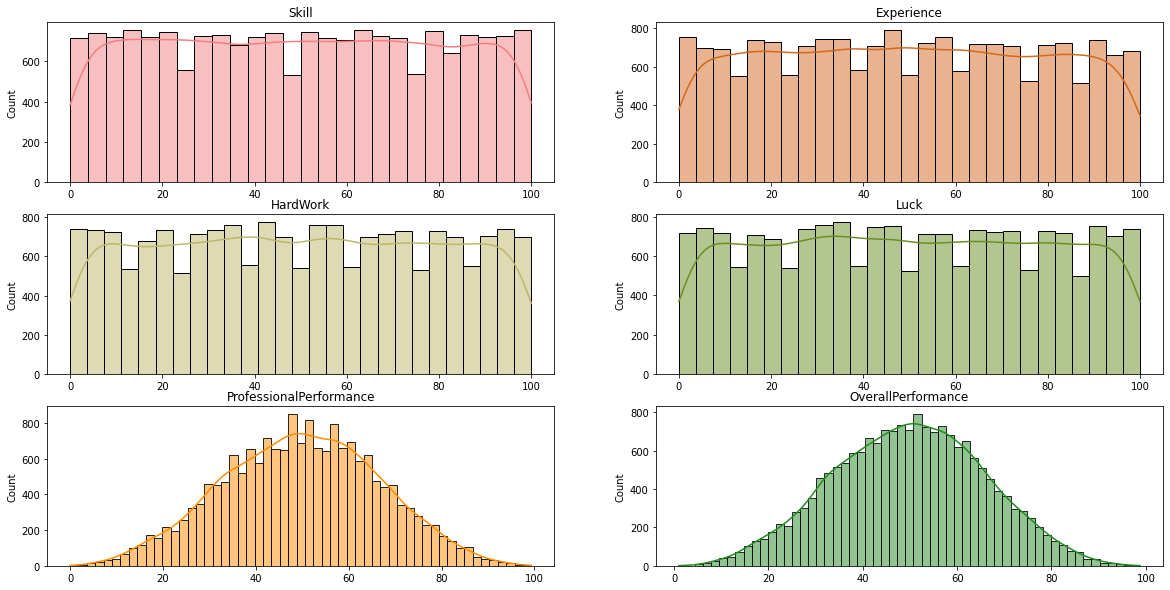

In [23]:
#check the df columns distribution
def df_analysis(df):
    fig, axs = plt.subplots(3, 2, figsize=(20,10))

    i = 0
    colors = ['lightcoral', 'chocolate', 'darkkhaki', 'olivedrab', 'darkorange', 'forestgreen']
    columns = ['Skill', 'Experience', 'HardWork', 'Luck', 'ProfessionalPerformance', 'OverallPerformance']
    
    for col in columns:
        g = sns.histplot(df[col], 
                        kde=True, 
                        color=colors[i],
                        ax=axs[i//2, i%2])
        g.set_title(col)
        g.set(xlabel=None)
        i+=1
    return

#check the last experiment data
df_analysis(df)
countMatch(df, isPrint = True)

From here, I realized I had made a mistake in my experiment. The professional performance and overall performance have actually become the data sets of the sum of multiple uniformly distributed data. Based on the central limit theorem, those two performances will have a normal distribution. As a result, we will have all our high-performance applicants clustered at the most right tale of the bell-shaped curve. Only very few applicants will be in that area, and we only select 0.06% of the population. So, the extra five percent luck will not dramatically affect the potential polling pool. That is the reason we have 7-8 applicants in both ranks.

### experiment 2

After that, I rewatched the video and realized that Veritasium only used skill to represent applicants' performance. So, let's redo our experiment again.

In [64]:
#only evaluate skill score as professional performance
def df_onlySkill_generate():
    df = pd.DataFrame(np.random.uniform(0,101,size=(num_applicants, 2)), columns=['Skill', 'Luck'])

    df['ProfessionalPerformance'] = df.Skill
    df['OverallPerformance'] = df.Skill*0.95 + df.Luck*0.05
    return df

#check the df columns distribution
def df_onlySkill_analysis(df):
    fig, axs = plt.subplots(2, 2, figsize=(20,10))

    i = 0
    colors = ['lightcoral', 'olivedrab', 'darkorange', 'forestgreen']
    columns = ['Skill', 'Luck', 'ProfessionalPerformance', 'OverallPerformance']
    
    for col in columns:
        g = sns.histplot(df[col], 
                        kde=True, 
                        color=colors[i],
                        ax=axs[i//2, i%2])
        g.set_title(col)
        g.set(xlabel=None)
        i+=1
    return

In [65]:
counts = []
n = 1000
for _ in range(n):
    df = df_onlySkill_generate()
    count= countMatch(df)
    counts.append(count)
avrg_luck_count = 11- mean(counts)
print(f"After {n} times experiments, there are overall {avrg_luck_count} applicants selected based on luck.")

After 1000 times experiments, there are overall 10 applicants selected based on luck.


Top 11 applicants based on the professional performance only

     Skill  Luck  ProfessionalPerformance  OverallPerformance
112    100    24                      100               96.20
165    100    62                      100               98.10
233    100    49                      100               97.45
274    100    48                      100               97.40
336    100    44                      100               97.20
645    100     7                      100               95.35
693    100    93                      100               99.65
844    100     6                      100               95.30
868    100    90                      100               99.50
953    100    11                      100               95.55
998    100    28                      100               96.40


Top 11 applicants based on the overall performance with luck

       Skill  Luck  ProfessionalPerformance  OverallPerformance
4986     100   100                      100              100.00
15

1

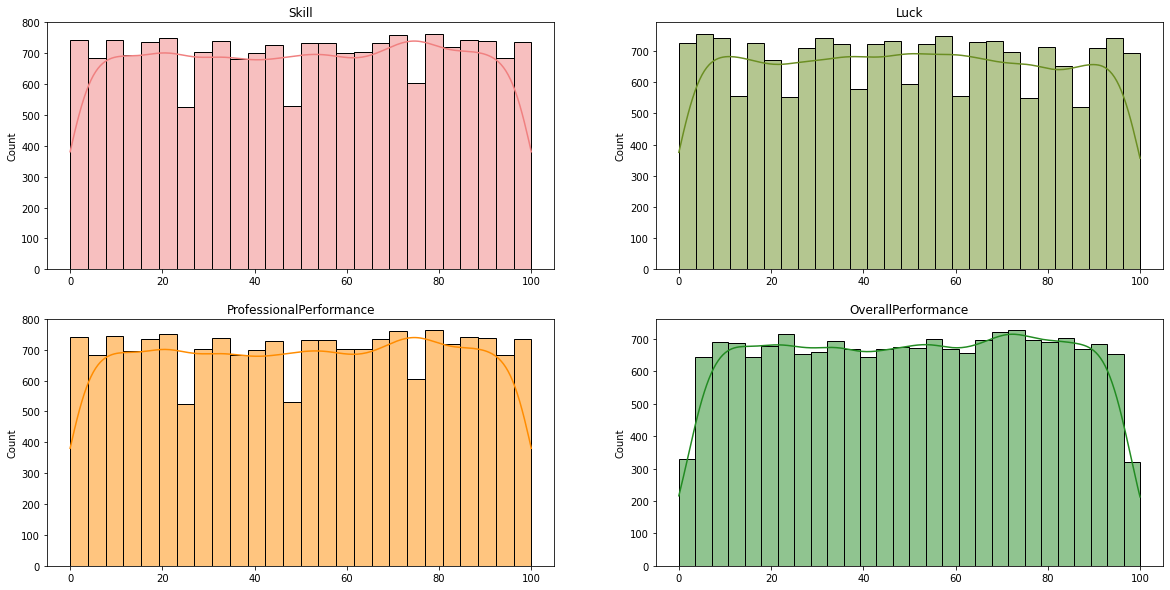

In [63]:
df_onlySkill_analysis(df)
countMatch(df, isPrint = True)

Now, we have a similar result as mentioned in the video. By checking the last experiment data, we can notice that all the top applicants in the two performance ranks have the same skill score (100), and luck becomes the only essential element after that.  

# Conclusion

Should we work hard if luck plays a crucial role in our success? Yes, of course. Even in the second case, we still need first to reach a 100 score on skill evaluation, then roll the dice of luck.

Use the quote from "Is Success Luck or Hard Work?" to end our article: "Best advice is paradoxical. First, you must believe that you are in complete control of your destiny and that your success comes down only to your own talent and hard work. But second, you've got to know that's not true for you or anyone else. So you have to remember: if you do achieve the success that luck played a significant role and given your good fortune, you should do what you can to increase the luck of others."